In [1]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

In [2]:

# 2. Display first 5 rows
print("🔹 First 5 rows of the dataset:")
print(df.head(), "\n")

🔹 First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [3]:

# 3. Dataset structure (rows, columns, data types, non-null counts)
print("🔹 Dataset info:")
print(df.info(), "\n")


🔹 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 



In [4]:

# 4. Check missing values in each column
print("🔹 Missing values per column:")
print(df.isnull().sum(), "\n")


🔹 Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 



In [5]:
# 5. Basic statistics for numeric columns
print("🔹 Summary statistics (numeric columns):")
print(df.describe())

🔹 Summary statistics (numeric columns):
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# Fill missing values in 'Age' using mean (future-proof)
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing values in 'Fare' using median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Fill missing values in 'Embarked' using mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Check
print(df['Embarked'].isnull().sum())
print(df.isnull().sum())

0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [7]:
# --- Safe encoding for 'Sex' ---
if 'Sex' in df.columns:
    # Fill missing values safely
    if df['Sex'].dropna().empty:
        df['Sex'] = 'male'  # default if all NaN
    else:
        df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])
    # Convert to numeric
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
else:
    print("'Sex' column not found.")

# --- Safe encoding for 'Embarked' ---
if 'Embarked' in df.columns:
    # Fill missing values safely
    if df['Embarked'].dropna().empty:
        df['Embarked'] = 'S'  # default if all NaN
    else:
        df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    # One-hot encode
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
else:
    print("'Embarked' column not found.")

# Show first 5 rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN       False        True  
1          PC 17599  71.2833   C85       False       False  
2  STON/O2. 3101282   7.9250   NaN       False        True  
3            113803  53.1000  C123       False      

In [9]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Show first 5 rows of scaled numerical features
print(df[numerical_cols].head())


        Age      Fare     SibSp     Parch    Pclass
0 -0.592481 -0.502445  0.432793 -0.473674  0.827377
1  0.638789  0.786845  0.432793 -0.473674 -1.566107
2 -0.284663 -0.488854 -0.474545 -0.473674  0.827377
3  0.407926  0.420730  0.432793 -0.473674 -1.566107
4  0.407926 -0.486337 -0.474545 -0.473674  0.827377


In [10]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to normalize
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Show first 5 rows of normalized numerical features
print(df[numerical_cols].head())


        Age      Fare  SibSp  Parch  Pclass
0  0.271174  0.014151  0.125    0.0     1.0
1  0.472229  0.139136  0.125    0.0     0.0
2  0.321438  0.015469  0.000    0.0     1.0
3  0.434531  0.103644  0.125    0.0     0.0
4  0.434531  0.015713  0.000    0.0     1.0


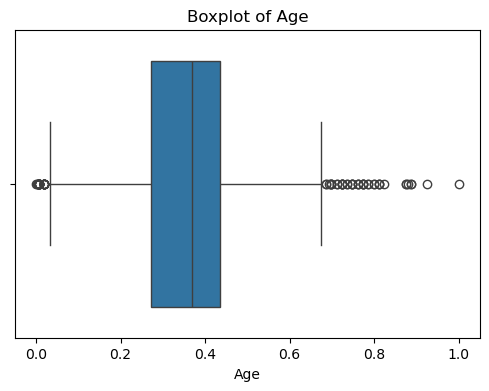

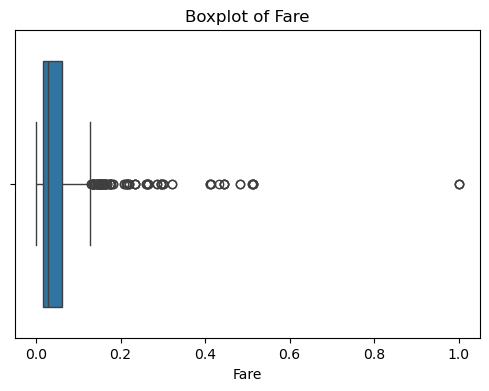

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to check for outliers
numerical_cols = ['Age', 'Fare']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
